In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.models import Model
import random

In [3]:
np.random.seed(0)

In [4]:
#Load the mnist dataset
(X_train, Y_train),(X_test,Y_test)=mnist.load_data()

In [5]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [6]:
assert(X_train.shape[0]==Y_train.shape[0]),"There are unequal number of Train images and Train Labels!"
assert(X_test.shape[0]==Y_test.shape[0]),"There are unequal number of Test images and Test Labels!"
assert(X_train.shape[1:]==(28,28)),"Dimensions of images are not 28X28!"
assert(X_test.shape[1:]==(28,28)),"Dimensions of images are not 28X28!"

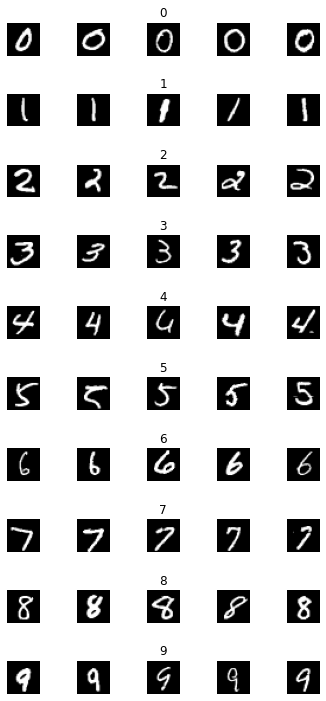

In [7]:
#Visualise the data we have
num_samples=[]

cols=5
num_classes=10
fig,axs=plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected=X_train[Y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),: ,:], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i==2:
            axs[j][i].set_title(str(j))
            num_samples.append(len(x_selected))

Text(0, 0.5, 'Number of Images')

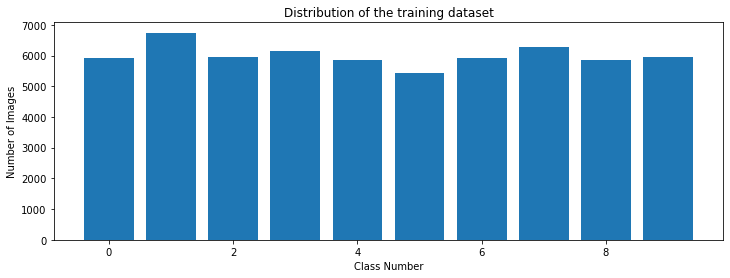

In [8]:
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of Images")

In [9]:
#The only difference here is the reshaping of the image as we are going to apply convolutions on the input image thus they have to be 28x28 with a depth of 1
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

#One hot encode the labels of both train and test data
Y_train=to_categorical(Y_train,10)
Y_test=to_categorical(Y_test,10)

In [10]:
#Normalising the data
X_train=X_train/255
X_test=X_test/255

#What we have done here is that we have reduced the range of the color intensity of each pixel from (0-255) to (0-1)
#Thus reducing a lot of computational cost and still preserving the features

In [11]:
#Here we define our model
#Note: We are going to implement a LeNET Model
def leNet_model():
    model=Sequential()
    
    #First Conv layer
    model.add(Conv2D(30,(5,5),input_shape=(28,28,1),activation='relu'))
    
    #First Pooling Layer
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    #Second Conv Layer
    model.add(Conv2D(15,(3,3),activation='relu'))
    #Here we have used less number of filters, to reduce the computational costs
    #Also since the image is small in this layer we will use a small filter size
    
    #Second Pooling layer
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    #This basically converts the entire 2D matrix into a 1D array as we did in the Deep Neural network project
    
    #Fully connected Neural Network
    model.add(Dense(500,activation='relu'))
    
    #Add a dropout layer
    model.add(Dropout(0.5))
    
    #Output layer
    model.add(Dense(num_classes,activation='softmax'))
    
    model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [12]:
model=leNet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 375)               0         
                                                                 
 dense (Dense)               (None, 500)               1

C:\Users\HP\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [13]:
history=model.fit(X_train, Y_train, epochs=10,validation_split=0.1,batch_size=400,verbose=1,shuffle=1)

Epoch 1/10
135/135 [==============================] - 16s 115ms/step - loss: 0.2472 - accuracy: 0.9215 - val_loss: 0.0632 - val_accuracy: 0.9807
Epoch 2/10
135/135 [==============================] - 15s 110ms/step - loss: 0.0755 - accuracy: 0.9766 - val_loss: 0.0688 - val_accuracy: 0.9803
Epoch 3/10
135/135 [==============================] - 16s 116ms/step - loss: 0.0602 - accuracy: 0.9818 - val_loss: 0.0393 - val_accuracy: 0.9897
Epoch 4/10
135/135 [==============================] - 15s 114ms/step - loss: 0.0501 - accuracy: 0.9845 - val_loss: 0.0359 - val_accuracy: 0.9897
Epoch 5/10
135/135 [==============================] - 15s 114ms/step - loss: 0.0480 - accuracy: 0.9850 - val_loss: 0.0415 - val_accuracy: 0.9875
Epoch 6/10
135/135 [==============================] - 15s 113ms/step - loss: 0.0426 - accuracy: 0.9870 - val_loss: 0.0387 - val_accuracy: 0.9878
Epoch 7/10
135/135 [==============================] - 15s 114ms/step - loss: 0.0433 - accuracy: 0.9868 - val_loss: 0.0394 - val_ac

Text(0.5, 0, 'Epochs')

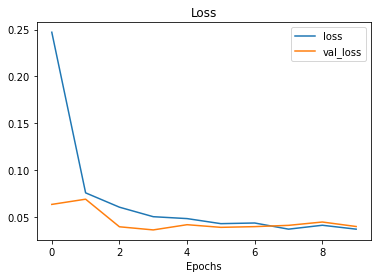

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

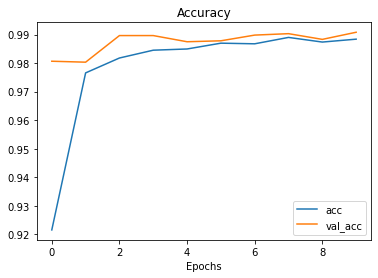

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc','val_acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [16]:
score=model.evaluate(X_test,Y_test, verbose=0)
print("Test Score= ",score[0])
print("Test Accuracy= ",score[1])

Test Score=  0.03462649881839752
Test Accuracy=  0.989799976348877


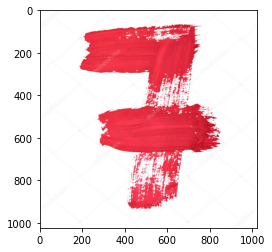

In [62]:
#Use a random image from the web to predict the number!
import requests
from PIL import Image

image_urls=['https://st.depositphotos.com/1000943/2726/i/950/depositphotos_27268273-stock-photo-red-letters.jpg'
       ,'https://static5.depositphotos.com/1000943/465/i/950/depositphotos_4652132-stock-photo-red-handwritten-letters-white-background.jpg'
       ,'https://static5.depositphotos.com/1000943/457/i/950/depositphotos_4570507-stock-photo-colorful-numbers.jpg'
       ,'https://static5.depositphotos.com/1000943/465/i/950/depositphotos_4651988-stock-photo-red-handwritten-digits-white-background.jpg'
       ,'https://st.depositphotos.com/1000943/2726/i/950/depositphotos_27268149-stock-photo-red-numbers.jpg'
       ,'https://st.depositphotos.com/1000943/1963/i/950/depositphotos_19630061-stock-photo-red-handwritten-numerals.jpg'
       ,'https://static5.depositphotos.com/1000943/465/i/950/depositphotos_4652004-stock-photo-red-handwritten-digits-white-background.jpg'
       ,'https://static5.depositphotos.com/1000943/465/i/950/depositphotos_4652005-stock-photo-red-handwritten-digits.jpg'
       ,'https://st.depositphotos.com/1000943/2726/i/950/depositphotos_27268131-stock-photo-red-numbers.jpg'
       ,'https://static5.depositphotos.com/1000943/457/i/950/depositphotos_4570520-stock-photo-colorful-numbers-isolated-white-background.jpg']
url=image_urls[7]
response=requests.get(url,stream=True)
img=Image.open(response.raw)
plt.imshow(img)

In [63]:
#Resize the image to 28X28
import cv2

img_array=np.asarray(img)
img_resized=cv2.resize(img_array,(28,28))
print(img_resized.shape)

(28, 28, 3)


In [64]:
img_grayscale=cv2.cvtColor(img_resized,cv2.COLOR_BGR2GRAY)
print(img_grayscale.shape)

(28, 28)


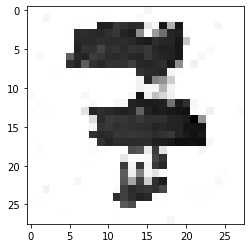

In [65]:
plt.imshow(img_grayscale,cmap='gray')

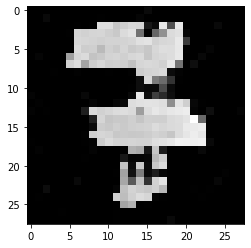

In [66]:
image=cv2.bitwise_not(img_grayscale)
plt.imshow(image,cmap='gray')

In [67]:
image=image/255
image=image.reshape(1,28,28,1)
prediction=model.predict(image)
pred_class=np.argmax(prediction,axis=1)
print("Predicted digit is : ",str(pred_class))

Predicted digit is :  [7]


In [68]:
#Here we try to visualize what is happening under the hood in each of the layers
layer1=Model(inputs=model.layers[0].input,outputs=model.layers[0].output) #Access the first conv layer
layer2=Model(inputs=model.layers[0].input,outputs=model.layers[2].output) #Access the second conv layer
visual_layer_1=layer1.predict(image)
visual_layer_2=layer2.predict(image)

print(visual_layer_1.shape)
print(visual_layer_2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


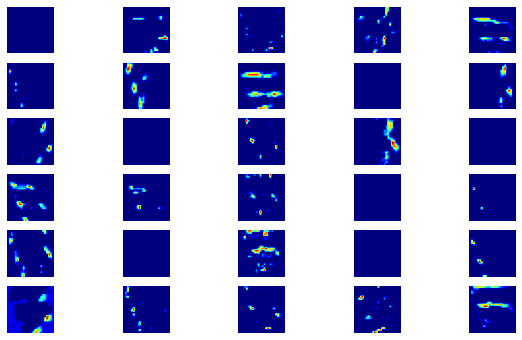

In [69]:
plt.figure(figsize=(10,6))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(visual_layer_1[0,:,:,i],cmap='jet')
    plt.axis('off')

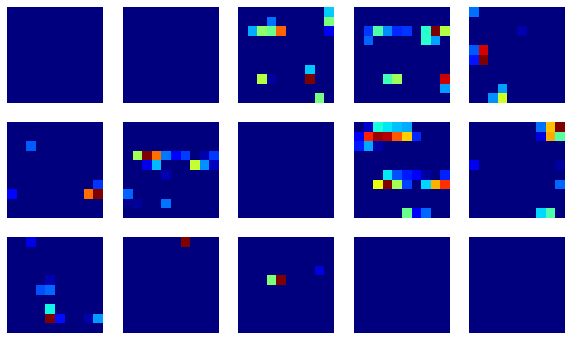

In [70]:
plt.figure(figsize=(10,6))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(visual_layer_2[0,:,:,i],cmap='jet')
    plt.axis('off')